# Wk4_Exercises_tutorial (with solutions)

Before you start, first import the pandas, NumPy, matplotlib, seaborn, SciPy and statsmodels libraries, for example as follows:
```python
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
```

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

__Introduction:__ Organizational size is the most common control variable in research that studies organizations as units of analysis. In such studies, researchers interchangeably use different measures (proxies) for this variable, of which market capitalization, number of employees, net sales and total assets are the most popular. Davis (2010, *ORM*) argues that this may be problematic, because these measures may have diverged over time, as the United States (similar to other countries) shifted from a manufacturing to a service economy. In the following series of questions you will examine whether Davis' observation is correct, in the sense that over time market capitalization has indeed become less strongly correlated with the other three size measures.

To do so, you first have to download three datasets from Compustat - Capital IQ (North America - Daily / Fundamentals Annual) that contain the following items: __CONM__, __TIC__, __PRCC_F__, __CSHO__, __EMP__, __SALE__, __AT__ and __SIC__, for all included firms for the __fiscal years 1970, 1995 and 2020__. Search the entire database, untick (Industry Format) FS and (Currency) CAD, select the necessary items, and select Excel spreadsheet (.xlsx) as query output.

__Q1:__ After collecting the three datasets, __for each of the datasets (and thus years)__, perform the following operations (in separate cells):  
- Use the `read_excel()` method to read the Excel file and load it into memory as a DataFrame, and display the DataFrame;  
- Remove all financial institutions (SIC: 6000–6999) and regulated industries (SIC: 4900–4999);  
- Create four new variables, where: 'market_capitalization' = PRCC_F * CSHO; 'no_of_employees' = EMP; 'net_sales' = SALE; and 'total_assets' = AT;  
- Select these four variables (columns), drop all missing values, and display the DataFrame.  

__NOTE:__ Be aware that due to changes in Compustat, your results may slightly differ from those shown here.

In [2]:
# Import the 1970 data

df_comp_1970 = pd.read_excel('data/comp_size_1970.xlsx')
df_comp_1970

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,ISO Currency Code,Assets - Total,Common Shares Outstanding,Employees,Sales/Turnover (Net),Active/Inactive Status Marker,Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1000,1970-12-31,1970,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,33.450,2.446,1.490,45.335,I,10.000000,3089
1,1002,1970-12-31,1970,INDL,C,D,STD,AAIC.1,AAI CORP,USD,13.722,0.877,0.954,21.330,I,4.000000,3825
2,1004,1971-05-31,1970,INDL,C,D,STD,AIR,AAR CORP,USD,13.468,0.774,0.400,21.286,A,15.124981,5080
3,1010,1970-12-31,1970,INDL,C,D,STD,4165A,ACF INDUSTRIES INC,USD,470.518,5.587,10.840,333.718,I,45.624985,3743
4,1017,1970-11-30,1970,INDL,C,D,STD,AELNA,AEL INDUSTRIES -CL A,USD,23.402,1.635,1.500,29.287,I,2.999995,3812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710,65499,1971-03-31,1970,INDL,C,D,STD,CCKM.CM,CIRCUIT CITY STORES -CONSOL,USD,18.989,0.644,1.200,55.886,I,12.001997,5731
3711,66430,1970-12-31,1970,INDL,C,D,STD,GPTG.CM,GEORGIA-PACIFIC CP -CONSOL,USD,1705.980,48.208,37.000,1199.430,I,57.125000,2600
3712,66591,1970-12-31,1970,INDL,C,D,STD,XEL5,PUBLIC SERVICE CO OF COLO,USD,788.233,15.458,4.856,220.294,A,23.250000,4931
3713,66624,1970-12-31,1970,INDL,C,D,STD,UNS1,TUCSON ELECTRIC POWER CO,USD,170.209,5.365,0.812,57.292,A,17.374999,4911


In [3]:
# Remove financial institutions and regulated industries

df_comp_1970 = df_comp_1970[(df_comp_1970['Standard Industry Classification Code'] < 4900) |
                            (df_comp_1970['Standard Industry Classification Code'] > 4999)]
df_comp_1970 = df_comp_1970[(df_comp_1970['Standard Industry Classification Code'] < 6000) |
                            (df_comp_1970['Standard Industry Classification Code'] > 6999)]

In [4]:
# Create four new variables ('market_capitalization', 'no_of_employees', 'net_sales' and 'total_assets')

df_comp_1970['market_capitalization'] = df_comp_1970['Price Close - Annual - Fiscal'] * df_comp_1970['Common Shares Outstanding']
df_comp_1970['no_of_employees'] = df_comp_1970['Employees']
df_comp_1970['net_sales'] = df_comp_1970['Sales/Turnover (Net)']
df_comp_1970['total_assets'] = df_comp_1970['Assets - Total']

In [5]:
# Select the four variables (columns), and drop all missing values

df_comp_1970 = df_comp_1970[['market_capitalization', 'no_of_employees', 'net_sales', 'total_assets']].dropna()
df_comp_1970

,market_capitalization,no_of_employees,net_sales,total_assets
0,24.460000,1.490,45.335,33.450
1,3.508000,0.954,21.330,13.722
2,11.706735,0.400,21.286,13.468
3,254.906790,10.840,333.718,470.518
4,4.904992,1.500,29.287,23.402
...,...,...,...,...
3692,1767.263625,200.734,4814.402,6311.031
3696,33.959999,1.400,58.498,41.981
3702,39.978267,0.350,8.281,41.249
3710,7.729286,1.200,55.886,18.989


In [6]:
# Import the 1995 data

df_comp_1995 = pd.read_excel('data/comp_size_1995.xlsx')
df_comp_1995

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,ISO Currency Code,Assets - Total,Common Shares Outstanding,Employees,Sales/Turnover (Net),Active/Inactive Status Marker,Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1004,1996-05-31,1995,INDL,C,D,STD,AIR,AAR CORP,USD,437.846,15.998,2.140,504.990,A,22.124999,5080
1,1010,1995-12-31,1995,INDL,C,D,STD,4165A,ACF INDUSTRIES INC,USD,2015.800,0.015,NaN,407.200,I,NaN,3743
2,1013,1995-10-31,1995,INDL,C,D,STD,ADCT.1,ADC TELECOMMUNICATIONS INC,USD,601.083,62.737,2.984,586.222,I,40.000000,3661
3,1019,1995-12-31,1995,INDL,C,D,STD,AFAP,AFA PROTECTIVE SYSTEMS INC,USD,28.487,0.198,NaN,27.492,I,115.000000,7380
4,1021,1995-06-30,1995,INDL,C,D,STD,IWKS,AFP IMAGING CORP,USD,11.790,6.449,0.161,26.589,I,0.875000,3844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,221616,1995-12-31,1995,INDL,C,D,STD,DTEGY,DEUTSCHE TELEKOM,USD,105356.000,2000.000,231.720,43481.000,A,NaN,4813
11436,221631,1995-12-31,1995,INDL,C,D,STD,RCO.1,SEAENERGY PLC,USD,13.248,19.309,0.108,10.708,I,NaN,1389
11437,221777,1995-09-30,1995,INDL,C,D,STD,RANGY,RANDGOLD & EXPLORATION CO,USD,129.367,38.041,NaN,20.689,A,NaN,1040
11438,223007,1995-12-31,1995,INDL,C,D,STD,SMV.B,SMEDVIG A/S,USD,867.000,33.491,2.800,310.000,I,NaN,1381


In [7]:
# Remove financial institutions and regulated industries

df_comp_1995 = df_comp_1995[(df_comp_1995['Standard Industry Classification Code'] < 4900) |
                            (df_comp_1995['Standard Industry Classification Code'] > 4999)]
df_comp_1995 = df_comp_1995[(df_comp_1995['Standard Industry Classification Code'] < 6000) |
                            (df_comp_1995['Standard Industry Classification Code'] > 6999)]

In [8]:
# Create four new variables ('market_capitalization', 'no_of_employees', 'net_sales' and 'total_assets')

df_comp_1995['market_capitalization'] = df_comp_1995['Price Close - Annual - Fiscal'] * df_comp_1995['Common Shares Outstanding']
df_comp_1995['no_of_employees'] = df_comp_1995['Employees']
df_comp_1995['net_sales'] = df_comp_1995['Sales/Turnover (Net)']
df_comp_1995['total_assets'] = df_comp_1995['Assets - Total']

In [9]:
# Select the four variables (columns), and drop all missing values

df_comp_1995 = df_comp_1995[['market_capitalization', 'no_of_employees', 'net_sales', 'total_assets']].dropna()
df_comp_1995

,market_capitalization,no_of_employees,net_sales,total_assets
0,353.955727,2.140,504.990,437.846
2,2509.480000,2.984,586.222,601.083
4,5.642875,0.161,26.589,11.790
6,565.945875,2.788,520.882,634.853
7,856.782500,10.666,1804.950,1485.372
...,...,...,...,...
11414,75.000250,0.282,41.158,27.179
11420,258.894000,1.303,90.183,162.389
11421,1781.450000,10.499,387.700,881.200
11433,558.696375,3.500,441.853,411.785


In [10]:
# Import the 2020 data

df_comp_2020 = pd.read_excel('data/comp_size_2020.xlsx')
df_comp_2020

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,ISO Currency Code,Assets - Total,Common Shares Outstanding,Employees,Sales/Turnover (Net),Active/Inactive Status Marker,Price Close - Annual - Fiscal,Standard Industry Classification Code
0,1004,2021-05-31,2020,INDL,C,D,STD,AIR,AAR CORP,USD,1539.700,35.375,4.700,1651.400,A,41.7500,5080
1,1045,2020-12-31,2020,INDL,C,D,STD,AAL,AMERICAN AIRLINES GROUP INC,USD,62008.000,621.480,102.700,17337.000,A,15.7700,4512
2,1050,2020-12-31,2020,INDL,C,D,STD,CECE,CECO ENVIRONMENTAL CORP,USD,419.314,35.367,0.730,316.011,A,6.9600,3564
3,1062,2020-11-30,2020,INDL,C,D,STD,ASA,ASA GOLD AND PRECIOUS METALS,USD,464.740,19.290,NaN,1.333,A,19.9100,6799
4,1075,2020-12-31,2020,INDL,C,D,STD,PNW,PINNACLE WEST CAPITAL CORP,USD,20020.421,112.688,6.026,3586.982,A,79.9500,4911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,331856,2020-12-31,2020,INDL,C,D,STD,IMUX,IMMUNIC INC,USD,167.861,21.168,0.028,0.000,A,15.2900,2836
8801,332115,2020-12-31,2020,INDL,C,D,STD,ARMP,ARMATA PHARMACEUTICALS INC,USD,39.516,18.688,0.062,0.823,A,2.9849,2836
8802,339965,2021-01-31,2020,INDL,C,D,STD,SNOW,SNOWFLAKE INC,USD,5921.739,287.918,2.495,592.049,A,272.4500,7370
8803,345920,2020-12-31,2020,INDL,C,D,STD,HYFM,HYDROFARM HLDNG GP INC,USD,275.795,33.500,0.327,342.205,A,52.5800,3524


In [11]:
# Remove financial institutions and regulated industries

df_comp_2020 = df_comp_2020[(df_comp_2020['Standard Industry Classification Code'] < 4900) |
                            (df_comp_2020['Standard Industry Classification Code'] > 4999)]
df_comp_2020 = df_comp_2020[(df_comp_2020['Standard Industry Classification Code'] < 6000) |
                            (df_comp_2020['Standard Industry Classification Code'] > 6999)]

In [12]:
# Create four new variables ('market_capitalization', 'no_of_employees', 'net_sales' and 'total_assets')

df_comp_2020['market_capitalization'] = df_comp_2020['Price Close - Annual - Fiscal'] * df_comp_2020['Common Shares Outstanding']
df_comp_2020['no_of_employees'] = df_comp_2020['Employees']
df_comp_2020['net_sales'] = df_comp_2020['Sales/Turnover (Net)']
df_comp_2020['total_assets'] = df_comp_2020['Assets - Total']

In [13]:
# Select the four variables (columns), and drop all missing values

df_comp_2020 = df_comp_2020[['market_capitalization', 'no_of_employees', 'net_sales', 'total_assets']].dropna()
df_comp_2020

,market_capitalization,no_of_employees,net_sales,total_assets
0,1476.906250,4.700,1651.400,1539.700
1,9800.739600,102.700,17337.000,62008.000
2,246.154320,0.730,316.011,419.314
6,193931.972700,109.000,34608.000,72548.000
7,17.044500,0.001,0.000,0.692
...,...,...,...,...
8800,323.658720,0.028,0.000,167.861
8801,55.781811,0.062,0.823,39.516
8802,78443.259100,2.495,592.049,5921.739
8803,1761.430000,0.327,342.205,275.795


__Q2:__ For each of the three datasets (and thus years), calculate the Pearson correlations. Based on these analyses, what is your conclusion concerning Davis' observation? Has market capitalization over time indeed become less strongly correlated with the other three size measures?

In [14]:
# Calculate the Pearson correlations for the 1970 dataset

df_comp_1970.corr(method='pearson')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.706842,0.774242,0.765006
no_of_employees,0.706842,1.000000,0.863728,0.780637
net_sales,0.774242,0.863728,1.000000,0.835333
total_assets,0.765006,0.780637,0.835333,1.000000


In [15]:
# Calculate the Pearson correlations for the 1995 dataset

df_comp_1995.corr(method='pearson')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.563888,0.718357,0.746439
no_of_employees,0.563888,1.000000,0.750043,0.684404
net_sales,0.718357,0.750043,1.000000,0.886894
total_assets,0.746439,0.684404,0.886894,1.000000


In [16]:
# Calculate the Pearson correlations for the 2020 dataset

df_comp_2020.corr(method='pearson')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.423483,0.587809,0.565567
no_of_employees,0.423483,1.000000,0.787053,0.567953
net_sales,0.587809,0.787053,1.000000,0.823755
total_assets,0.565567,0.567953,0.823755,1.000000


__Q3:__ For each of the three datasets (and thus years), calculate the Spearman correlations. Based on these analyses, what is your conclusion concerning Davis' observation? Has market capitalization over time indeed become less strongly correlated with the other three size measures? Do you draw the same conclusion as based on the Pearson correlations?

In [17]:
# Calculate the Spearman correlations for the 1970 datset

df_comp_1970.corr(method='spearman')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.755210,0.798959,0.842341
no_of_employees,0.755210,1.000000,0.924859,0.877457
net_sales,0.798959,0.924859,1.000000,0.923566
total_assets,0.842341,0.877457,0.923566,1.000000


In [18]:
# Calculate the Spearman correlations for the 1995 dataset

df_comp_1995.corr(method='spearman')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.721805,0.767888,0.861536
no_of_employees,0.721805,1.000000,0.921877,0.871986
net_sales,0.767888,0.921877,1.000000,0.931086
total_assets,0.861536,0.871986,0.931086,1.000000


In [19]:
# Calculate the Spearman correlations for the 2020 dataset

df_comp_2020.corr(method='spearman')

,market_capitalization,no_of_employees,net_sales,total_assets
market_capitalization,1.000000,0.749314,0.761510,0.870257
no_of_employees,0.749314,1.000000,0.922495,0.868223
net_sales,0.761510,0.922495,1.000000,0.912077
total_assets,0.870257,0.868223,0.912077,1.000000


__Q4:__ Assuming that you have drawn (at least somewhat) different conclusions based on the Pearson and Spearman correlations, one possible reason may be that the variables are not normally distributed. Based on the 2020 dataset, examine whether the four variables are normally distributed by displaying their histograms.

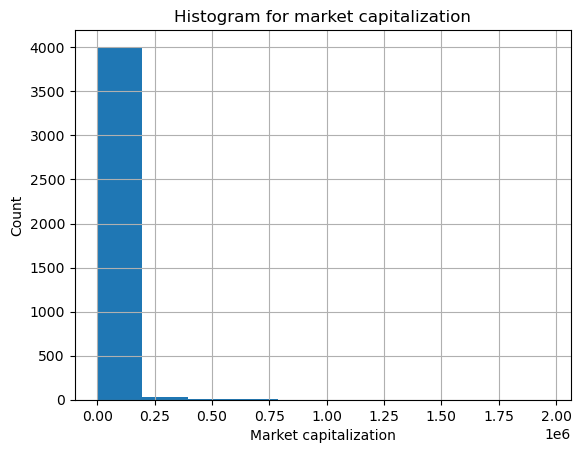

In [20]:
# Display the histogram for 'market_capitalization'

df_comp_2020['market_capitalization'].hist()
plt.title('Histogram for market capitalization')
plt.xlabel('Market capitalization')
plt.ylabel('Count');

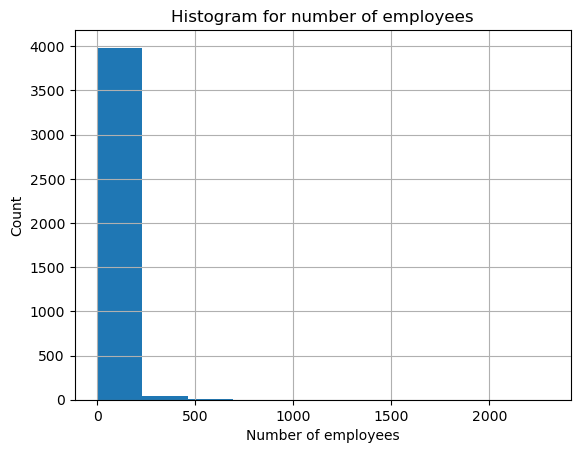

In [21]:
# Display the histogram for 'no_of_employees'

df_comp_2020['no_of_employees'].hist()
plt.title('Histogram for number of employees')
plt.xlabel('Number of employees')
plt.ylabel('Count');

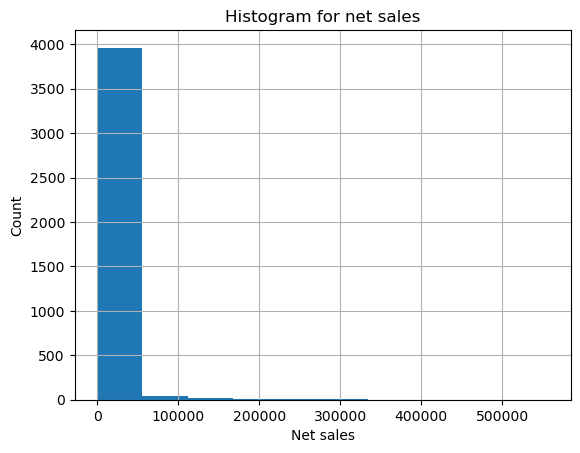

In [22]:
# Display the histogram for 'net_sales'

df_comp_2020['net_sales'].hist()
plt.title('Histogram for net sales')
plt.xlabel('Net sales')
plt.ylabel('Count');

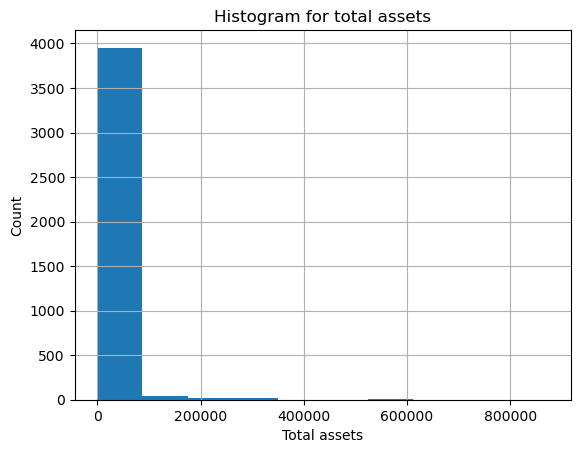

In [23]:
# Display the histogram for 'total_assets'

df_comp_2020['total_assets'].hist()
plt.title('Histogram for total assets')
plt.xlabel('Total assets')
plt.ylabel('Count');

__Q5:__ Assuming that you have concluded that the variables (at least in the 2020 dataset) are not normally distributed, use the 'natural_log' function that was defined earlier in the course (and that, if necessary, shifts a variable's distribution such that its minimum value becomes 1, and then calculates its natural logarithm) to create four new variables (with suffixes "_ln") by taking the natural logarithms of the four variables for the 2020 dataset.

In [24]:
# Define the 'natural_log' function

def natural_log(x):
    if min(x) < 1:
        if min(x) < 0:
            x += (min(x)*-1) + 1
        else:
            x += (1 - min(x))
    return np.log(x)

In [25]:
# Create the four transformed variables for the 2020 dataset

df_comp_2020['market_capitalization_ln'] = natural_log(df_comp_2020['market_capitalization'])
df_comp_2020['no_of_employees_ln'] = natural_log(df_comp_2020['no_of_employees'])
df_comp_2020['net_sales_ln'] = natural_log(df_comp_2020['net_sales'])
df_comp_2020['total_assets_ln'] = natural_log(df_comp_2020['total_assets'])

__Q6:__ Based on the 2020 dataset, examine whether the four new (transformed) variables are normally distributed by displaying their histograms.

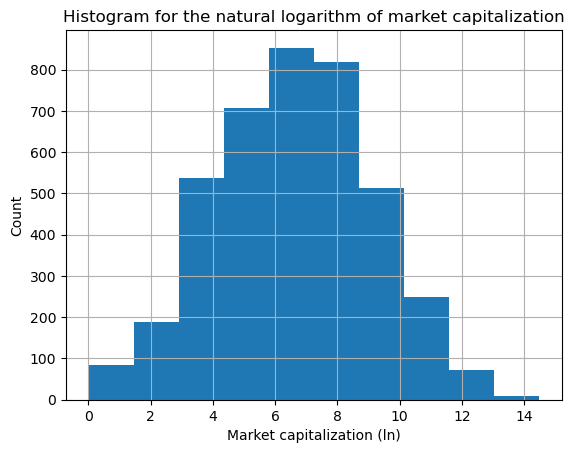

In [26]:
# Display the histogram for 'market_capitalization_ln'

df_comp_2020['market_capitalization_ln'].hist()
plt.title('Histogram for the natural logarithm of market capitalization')
plt.xlabel('Market capitalization (ln)')
plt.ylabel('Count');

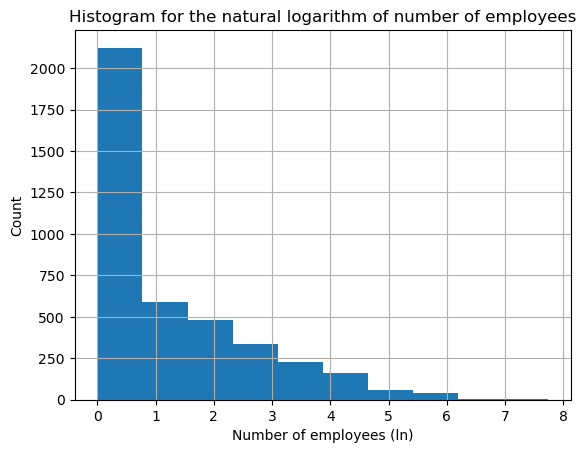

In [27]:
# Display the histogram for 'no_of_employees_ln'

df_comp_2020['no_of_employees_ln'].hist()
plt.title('Histogram for the natural logarithm of number of employees')
plt.xlabel('Number of employees (ln)')
plt.ylabel('Count');

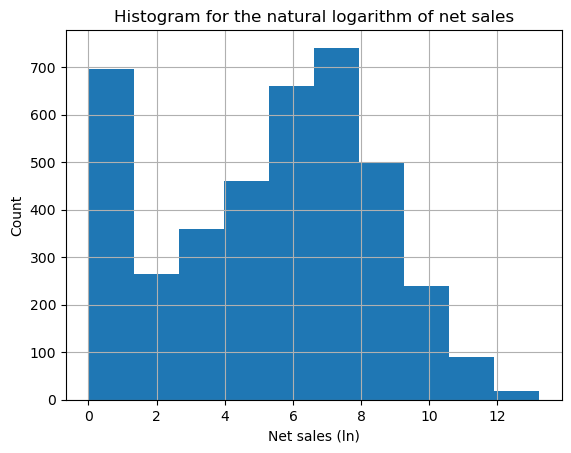

In [28]:
# Display the histogram for 'net_sales_ln'

df_comp_2020['net_sales_ln'].hist()
plt.title('Histogram for the natural logarithm of net sales')
plt.xlabel('Net sales (ln)')
plt.ylabel('Count');

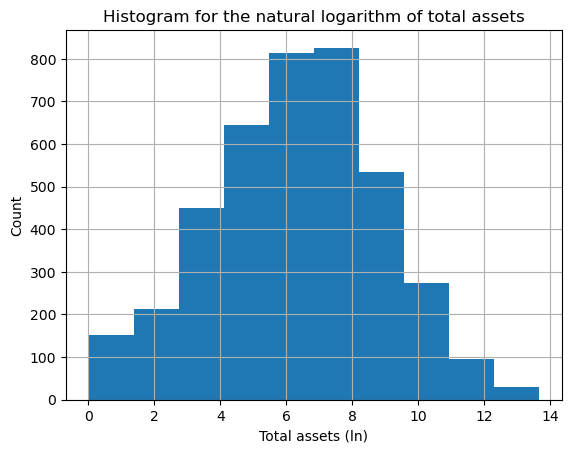

In [29]:
# Display the histogram for 'total_assets_ln'

df_comp_2020['total_assets_ln'].hist()
plt.title('Histogram for the natural logarithm of total assets')
plt.xlabel('Total assets (ln)')
plt.ylabel('Count');

__Q7:__ Assuming that you have found that (at least in the 2020 dataset) the four transformed variables are more normally distributed than the four original variables, use the 'natural_log' function that was defined earlier in the course to create four new variables (with suffixes "_ln") by taking the natural logarithms of the four variables for the 1970 and 1995 datasets.

In [30]:
# Create the four transformed variables for the 1970 dataset

df_comp_1970['market_capitalization_ln'] = natural_log(df_comp_1970['market_capitalization'])
df_comp_1970['no_of_employees_ln'] = natural_log(df_comp_1970['no_of_employees'])
df_comp_1970['net_sales_ln'] = natural_log(df_comp_1970['net_sales'])
df_comp_1970['total_assets_ln'] = natural_log(df_comp_1970['total_assets'])

In [31]:
# Create the four transformed variables for the 1995 dataset

df_comp_1995['market_capitalization_ln'] = natural_log(df_comp_1995['market_capitalization'])
df_comp_1995['no_of_employees_ln'] = natural_log(df_comp_1995['no_of_employees'])
df_comp_1995['net_sales_ln'] = natural_log(df_comp_1995['net_sales'])
df_comp_1995['total_assets_ln'] = natural_log(df_comp_1995['total_assets'])

__Q8:__ For each of the three datasets (and thus years), calculate the Pearson correlations based on the four transformed variables. Based on these analyses, what is your conclusion concerning Davis' observation? Has market capitalization over time indeed become less strongly correlated with the other three size measures?

In [32]:
# Calculate the Pearson correlations for the 1970 datset

df_comp_1970[['market_capitalization_ln', 'no_of_employees_ln', 'net_sales_ln', 'total_assets_ln']].corr(method='pearson')

,market_capitalization_ln,no_of_employees_ln,net_sales_ln,total_assets_ln
market_capitalization_ln,1.000000,0.797639,0.820260,0.868622
no_of_employees_ln,0.797639,1.000000,0.917254,0.891526
net_sales_ln,0.820260,0.917254,1.000000,0.931449
total_assets_ln,0.868622,0.891526,0.931449,1.000000


In [33]:
# Calculate the Pearson correlations for the 1995 dataset

df_comp_1995[['market_capitalization_ln', 'no_of_employees_ln', 'net_sales_ln', 'total_assets_ln']].corr(method='pearson')

,market_capitalization_ln,no_of_employees_ln,net_sales_ln,total_assets_ln
market_capitalization_ln,1.000000,0.736929,0.789520,0.884904
no_of_employees_ln,0.736929,1.000000,0.845799,0.841168
net_sales_ln,0.789520,0.845799,1.000000,0.930296
total_assets_ln,0.884904,0.841168,0.930296,1.000000


In [34]:
# Calculate the Pearson correlations for the 2020 dataset

df_comp_2020[['market_capitalization_ln', 'no_of_employees_ln', 'net_sales_ln', 'total_assets_ln']].corr(method='pearson')

,market_capitalization_ln,no_of_employees_ln,net_sales_ln,total_assets_ln
market_capitalization_ln,1.000000,0.708932,0.738813,0.871426
no_of_employees_ln,0.708932,1.000000,0.820191,0.801629
net_sales_ln,0.738813,0.820191,1.000000,0.881671
total_assets_ln,0.871426,0.801629,0.881671,1.000000
